In [ ]:
import time
import os
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join
from glob import glob
from tqdm.notebook import tqdm

In [ ]:
train_path = '/content/drive/MyDrive/data/pca_data1/train'
test_path = '/content/drive/MyDrive/data/pca_data1/test'

list_train = sorted(glob(join(train_path, '*')))
list_test = sorted(glob(join(test_path, '*')))

## 2차원 이미지를 1차원 배열로 만듦

In [ ]:
X = [] #(50, 37)을 1차원 배열로 바꾼 후 966개를 쌓아 만든 2차원 배열
train_info = [] #각각의 데이터의 주인과 사진파일명 저장

for i in range(len(list_train)) :
  path = list_train[i]
  list_img = sorted(glob(join(path, '*.png'))) #주어진 폴더 경로에서 png 확장자의 파일명 전부 저장
  name = path.split('/')[-1]
  for j in range(len(list_img)) :
    #사진파일 불러와 1차원으로 수정
    data = cv2.imread(list_img[j], 0)
    data = data.reshape(-1)
    X.append(data.tolist())
    #train_info에 사람이름과 파일명 저장
    tmp = []
    tmp.append(name)
    tmp.append(list_img[j].split('/')[-1])
    train_info.append(tmp)

X = np.array(X, dtype='float')
train_info = np.array(train_info)
print(X.shape)

(966, 1850)


In [ ]:
Y = []
test_info = []

for i in range(len(list_test)) :
  path = list_test[i]
  list_img = sorted(glob(join(path, '*.png')))
  name = path.split('/')[-1]
  for j in range(len(list_img)) :
    data = cv2.imread(list_img[j], 0)
    data = data.reshape(-1)
    Y.append(data.tolist())
    tmp = []
    tmp.append(name)
    tmp.append(list_img[j].split('/')[-1])
    test_info.append(tmp)

Y = np.array(Y, dtype='float')
test_info = np.array(test_info)
print(Y.shape)

(322, 1850)


## 평균 벡터 m 구하기

In [ ]:
m = X.sum(axis=0) / len(X)
print(m)
print(m.shape)

[ 92.72877847  97.71221532 108.09006211 ... 120.94927536 113.70910973
 106.42650104]
(1850,)


## X와 m의 차 구하기

In [ ]:
for i in range(len(X)) :
  X[i] = X[i] - m

print(X.sum())

-4.9112713895738125e-11


## 공분산 행렬 cov 구하기

In [ ]:
X = X.T
cov = X @ X.T / len(X)

print(cov.shape)
print(cov)

(1850, 1850)
[[1141.5367243  1045.60356779  844.86518717 ...  -21.28772425
   -46.49092608  -75.93689553]
 [1045.60356779 1070.89297073  929.70650663 ...   -9.61897376
   -27.00100946  -62.80239606]
 [ 844.86518717  929.70650663  970.23198086 ...  -24.05058754
   -39.12577975  -79.43573275]
 ...
 [ -21.28772425   -9.61897376  -24.05058754 ... 3162.05217
  2900.60526831 2393.5350803 ]
 [ -46.49092608  -27.00100946  -39.12577975 ... 2900.60526831
  3237.05689721 3023.86424151]
 [ -75.93689553  -62.80239606  -79.43573275 ... 2393.5350803
  3023.86424151 3303.32123328]]


## 고유값, 고유벡터 구하기

In [ ]:
eigen_val, eigen_vec = np.linalg.eig(cov)
print(eigen_val)
print(eigen_vec)

[2.61550515e+05+0.00000000e+00j 2.04373745e+05+0.00000000e+00j
 9.57689511e+04+0.00000000e+00j ... 4.98540963e-14-7.65220470e-14j
 8.91823448e-14+1.17135712e-14j 8.91823448e-14-1.17135712e-14j]
[[ 0.00684654+0.00000000e+00j -0.02303448+0.00000000e+00j
   0.02188003+0.00000000e+00j ... -0.00350249+9.19143549e-04j
  -0.00041862+1.09854598e-04j -0.00041862-1.09854598e-04j]
 [ 0.00752831+0.00000000e+00j -0.02154981+0.00000000e+00j
   0.02018681+0.00000000e+00j ... -0.00089411+2.54948684e-04j
   0.00062838+9.09908465e-05j  0.00062838-9.09908465e-05j]
 [ 0.00917916+0.00000000e+00j -0.02277939+0.00000000e+00j
   0.01902509+0.00000000e+00j ...  0.00080517+7.40616676e-04j
  -0.00035662+2.96508037e-06j -0.00035662-2.96508037e-06j]
 ...
 [ 0.01430729+0.00000000e+00j  0.04398711+0.00000000e+00j
   0.05722535+0.00000000e+00j ...  0.01930511+5.65052529e-03j
  -0.01025137+2.59419323e-04j -0.01025137-2.59419323e-04j]
 [ 0.01293851+0.00000000e+00j  0.04318153+0.00000000e+00j
   0.05075455+0.00000000e+0

## 각각의 PC에 대해 중요도 구하기

In [ ]:
variations = eigen_val / (len(eigen_val) - 1)
importances = variations / variations.sum()

print("%.2f" %(importances.sum()))

1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


## 고유값 상위 5개의 eigenface 시각화하기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


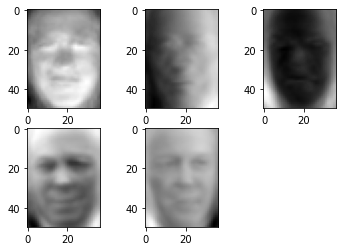

In [ ]:
for i in range(5) :
  vec = np.reshape(eigen_vec[:, i], (50, 37))
  vec = np.array(vec*10000, dtype='int')
  plt.subplot(2,3,i+1)
  plt.imshow(vec, cmap='gray')

## 고유 벡터의 개수에 따른 퍼센트

In [ ]:
print("%.2f" %(importances[:3].sum()))
print("%.2f" %(importances[:128].sum()))
print("%.2f" %(importances[:512].sum()))
print("%.2f" %(importances[:1024].sum()))

0.42
0.95
1.00
1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [ ]:
V = eigen_vec[:,:128] #고유벡터를 상위 몇개만 추려 만든 V
x = V.T @ X #V와 X를 통해 만든 특징벡터 x

print(x.shape)

(128, 966)


## 테스트할 데이터를 처리함

In [ ]:
Y = Y - m
Y = Y.T
y = V.T @ Y

print(y.shape)

(128, 322)


## y 중 하나와 가장 가까운 x 찾아 매칭(유클리디안)

In [ ]:
y_pred_euc = []

for i in range(len(y.T)) :
  min = 99999999
  index = -1
  for j in range(len(x.T)) :
    tmp = y[:,i] - x[:,j]
    dist = np.sqrt(tmp @ tmp.T)
    if(min > dist) :
      min = dist
      index = j
  y_pred_euc.append(train_info[index].tolist())

y_pred_euc = np.array(y_pred_euc)

print(y_pred_euc)
print(len(y_pred_euc))

[['Ariel_Sharon' '00413.png']
 ['Ariel_Sharon' '00651.png']
 ['Ariel_Sharon' '00260.png']
 ['Ariel_Sharon' '00289.png']
 ['Colin_Powell' '00447.png']
 ['Colin_Powell' '00087.png']
 ['George_W_Bush' '00199.png']
 ['Donald_Rumsfeld' '00573.png']
 ['Gerhard_Schroeder' '00403.png']
 ['Colin_Powell' '00867.png']
 ['Ariel_Sharon' '00873.png']
 ['Colin_Powell' '00787.png']
 ['Donald_Rumsfeld' '00002.png']
 ['Colin_Powell' '00494.png']
 ['Colin_Powell' '00104.png']
 ['Colin_Powell' '00489.png']
 ['George_W_Bush' '00552.png']
 ['Colin_Powell' '00013.png']
 ['Gerhard_Schroeder' '00699.png']
 ['George_W_Bush' '00528.png']
 ['Colin_Powell' '00547.png']
 ['Donald_Rumsfeld' '00206.png']
 ['Colin_Powell' '00597.png']
 ['Colin_Powell' '00494.png']
 ['Ariel_Sharon' '00289.png']
 ['Colin_Powell' '00266.png']
 ['George_W_Bush' '00791.png']
 ['Tony_Blair' '00201.png']
 ['Colin_Powell' '00301.png']
 ['Colin_Powell' '00571.png']
 ['George_W_Bush' '00370.png']
 ['Donald_Rumsfeld' '00175.png']
 ['George_W_Bus

In [ ]:
correct_dist = 0
for i in range(len(y_pred_euc)) :
  if y_pred_euc[i,0] == test_info[i,0] :
    correct_dist += 1

print(correct_dist)
print("%.2f" %(correct_dist/len(y_pred_euc) * 100))

177
54.97


## SGD 분류기를 사용해 매칭

In [ ]:
from sklearn.linear_model import SGDClassifier

x_train = np.array(x.T,dtype='int')
print(x_train.shape)

sgd = SGDClassifier(max_iter=10000)
sgd.fit(x_train, train_info[:,0])

(966, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


SGDClassifier(max_iter=10000)

In [ ]:
y_pred_sgd = np.array(y.T,dtype='int')

y_pred_sgd = sgd.predict(y_pred_sgd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [ ]:
correct_sgd = 0
for i in range(len(y_pred_sgd)) :
  if y_pred_sgd[i] == test_info[i,0] :
    correct_sgd += 1

print(correct_sgd)
print("%.2f" %(correct_sgd/len(y_pred_sgd) * 100))

191
59.32


## Metric 계산

In [ ]:
from sklearn.metrics import *

print("Euclidean distance Confusion matrix : ")
print(confusion_matrix(test_info[:,0], y_pred_euc[:,0]))
print(classification_report(test_info[:,0], y_pred_euc[:,0],
                            target_names=["Ariel_Sharon", "Colin_Powell", "Donald_Rumsfeld", "George_W_Bush", "Gerhard_Schroeder","Hugo_Chavez","Tony_Blair"]))

print("SGD Confusion matrix : ")
print(confusion_matrix(test_info[:,0], y_pred_sgd))
print(classification_report(test_info[:,0], y_pred_sgd,
                            target_names=["Ariel_Sharon", "Colin_Powell", "Donald_Rumsfeld", "George_W_Bush", "Gerhard_Schroeder","Hugo_Chavez","Tony_Blair"]))



Euclidean distance Confusion matrix : 
[[  5   4   2   1   1   0   0]
 [  3  28   9  13   2   2   3]
 [  3   3  14   7   0   0   0]
 [  3   9  12 100   5   8   9]
 [  1   3   0   5   7   1   8]
 [  0   1   0   1   3   9   1]
 [  0   4   2  14   2   0  14]]
                   precision    recall  f1-score   support

     Ariel_Sharon       0.33      0.38      0.36        13
     Colin_Powell       0.54      0.47      0.50        60
  Donald_Rumsfeld       0.36      0.52      0.42        27
    George_W_Bush       0.71      0.68      0.70       146
Gerhard_Schroeder       0.35      0.28      0.31        25
      Hugo_Chavez       0.45      0.60      0.51        15
       Tony_Blair       0.40      0.39      0.39        36

         accuracy                           0.55       322
        macro avg       0.45      0.47      0.46       322
     weighted avg       0.56      0.55      0.55       322

SGD Confusion matrix : 
[[ 4  2  3  3  1  0  0]
 [ 1 43  8  5  1  1  1]
 [ 3  6 11  3  2  0

## 내 얼굴 읽어오기

81 133 236 288


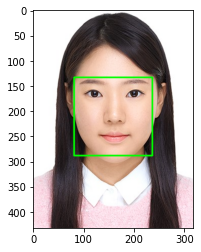

In [ ]:
import dlib

img_bgr = cv2.imread('my_face.jpg')
img_show = img_bgr.copy()

detector_hog = dlib.get_frontal_face_detector()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)


for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_rgb, (l,t), (r,b),
									(0,255,0), 2, lineType=cv2.LINE_AA)

print(l, t, r, b)
plt.imshow(img_rgb)
plt.show()

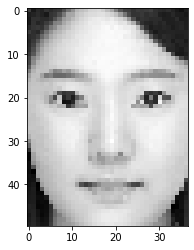

In [ ]:
t = t - 55

my_img = img_bgr[t:b,l:r].copy()
my_img = cv2.resize(my_img,(37, 50))
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)

plt.imshow(my_img, cmap='gray')
plt.show()

In [ ]:
my_data = my_img.reshape(-1)
my_data = np.array(my_data, dtype='float')

my_data = my_data - m
my_y = V.T @ my_data

In [ ]:
my_pred = []

min = 99999999
index = -1
for i in range(len(x.T)) :
  tmp = my_y - x[:,i]
  dist = np.sqrt(tmp @ tmp.T)
  if(min > dist) :
    min = dist
    index = i
my_pred.append(train_info[index].tolist())

print(my_pred)

[['George_W_Bush', '00141.png']]
